### Capacity of a network defined by:
1) Number of neuron/nodes
2) Number of hidden layers

In [37]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
from keras.optimizers import SGD

In [38]:
trainX, trainy, testX, testy = ut.create_dataset()
n_input, n_classes = trainX.shape[1], testy.shape[1]

## Number of hidden layers 

In [39]:
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    model = tf.keras.Sequential()
    model.add(layers.Dense(10, activation='relu', name='layer-0', input_shape=(n_input,)))
    for i in range(n_layers):
        model.add(layers.Dense(10, activation='relu', name='layer-'+str(i+1), input_shape=(n_input,)))            
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-'+str(i+2)))
        
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc

layers=1: 0.942
layers=2: 1.000
layers=3: 1.000
layers=4: 0.996
layers=5: 0.980


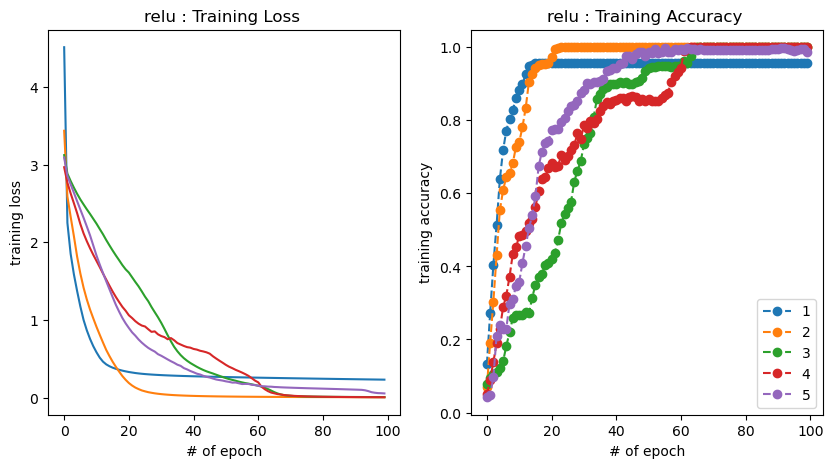

In [40]:
num_layers = [1,2,3,4,5]
plt.figure(figsize=(10,5))
activation = 'relu'
for n_layers in num_layers:
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('layers=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')
  plt.title(activation + ' : Training Loss ')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')
  plt.title(activation + ' : Training Accuracy ')

plt.legend()
plt.show()

## Number of neurons (only 1 hidden layer)

In [41]:
## number of hidden layers is 1 but # of neurons/nodes is variable 

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    model = tf.keras.Sequential()
    model.add(layers.Dense(n_nodes,activation='relu', name='layer1', input_shape=(n_input,)))
    model.add(layers.Dense(n_classes, activation='softmax', name='layer2'))
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # This builds the model for the first time:
    history = model.fit(trainX, trainy, epochs=90, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc


nodes=1: 0.096
nodes=2: 0.328
nodes=3: 0.612
nodes=4: 0.878
nodes=5: 0.922
nodes=6: 0.998
nodes=7: 0.940
nodes=50: 1.000


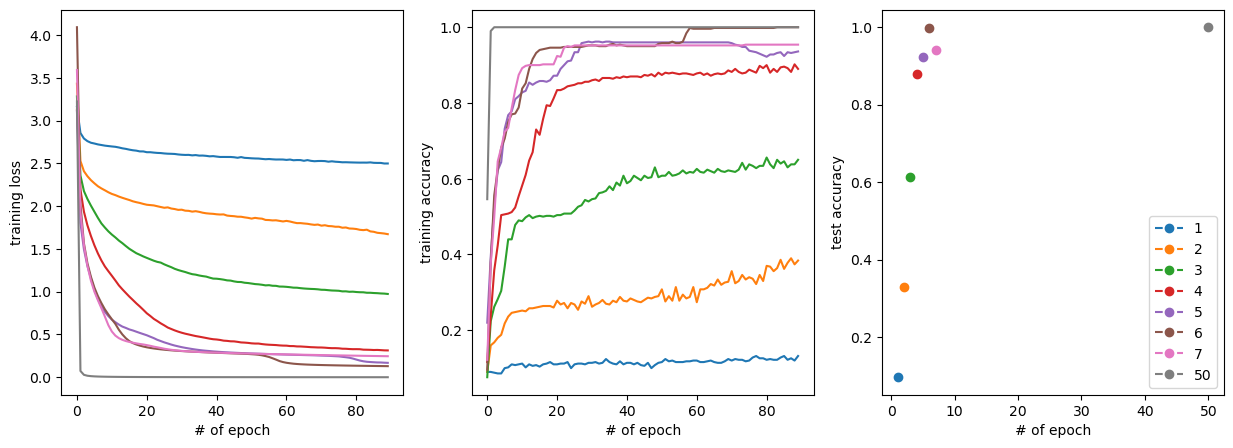

In [43]:
num_nodes = [1, 2, 3, 4, 5, 6, 7, 50]
plt.figure(figsize=(15,5))
for n_nodes in num_nodes:
  # evaluate model with a given number of nodes
  history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_nodes, result))

  # plot learning curve 
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'], label=str(n_nodes))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'], label=str(n_nodes))
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

  plt.subplot(1,3,3)
  plt.plot(n_nodes, result, label=str(n_nodes), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('test accuracy')

# show the plot

plt.legend()
plt.show()